In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost

In [2]:
!ls ../input/playground-series-s4e6

sample_submission.csv  test.csv  train.csv


In [3]:
SOURCE_DIR = '../input/playground-series-s4e6'

In [4]:
df_train = pd.read_csv(os.path.join(SOURCE_DIR, "train.csv"))
df_test = pd.read_csv(os.path.join(SOURCE_DIR, "test.csv"))
df_sub = pd.read_csv(os.path.join(SOURCE_DIR, "sample_submission.csv"))
print(df_train.shape)
df_train.head(5)

(76518, 38)


,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [5]:
df_train.isna().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [6]:
df_train.dtypes

id                                                  int64
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees u

In [7]:
feature_cols = df_train.columns.tolist()
feature_cols.remove('id')
feature_cols.remove('Target')

/tmp/ipykernel_19/1124773855.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


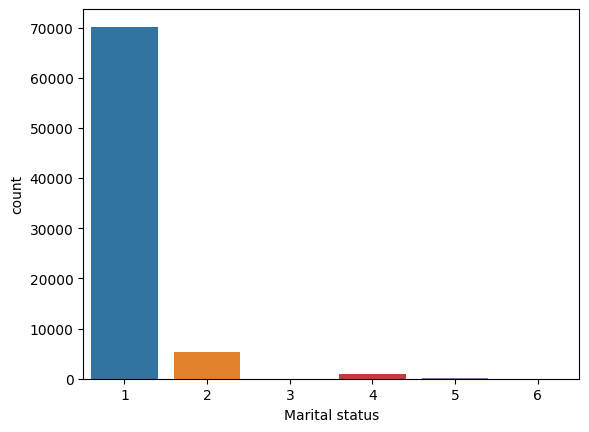

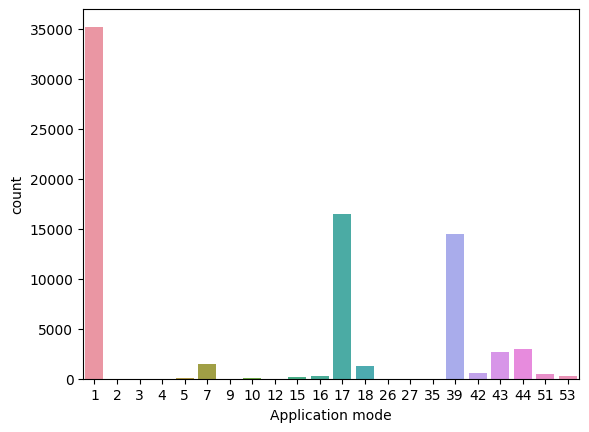

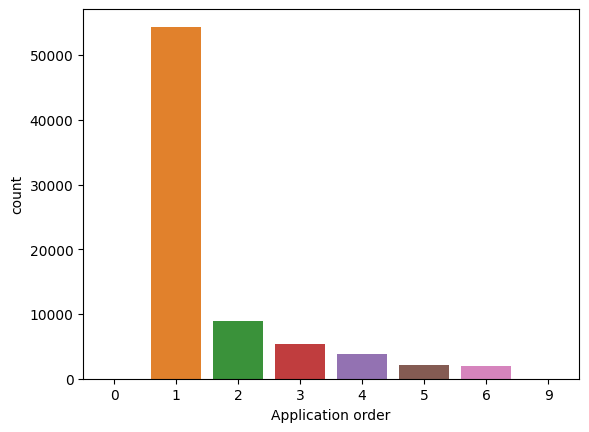

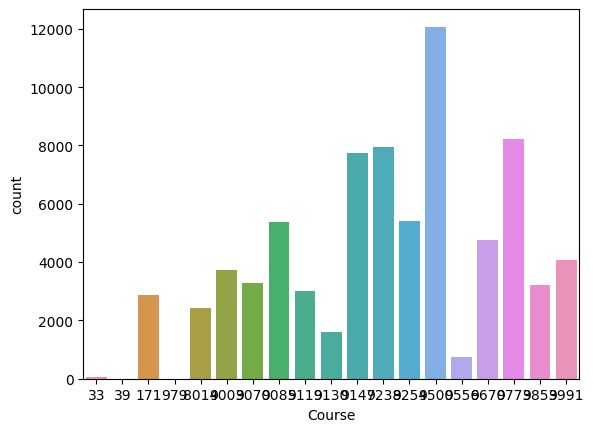

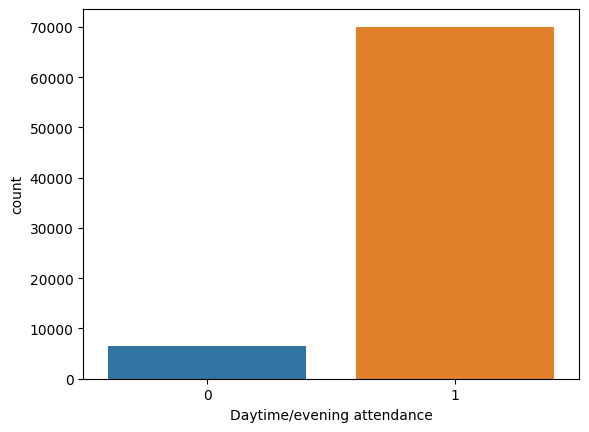

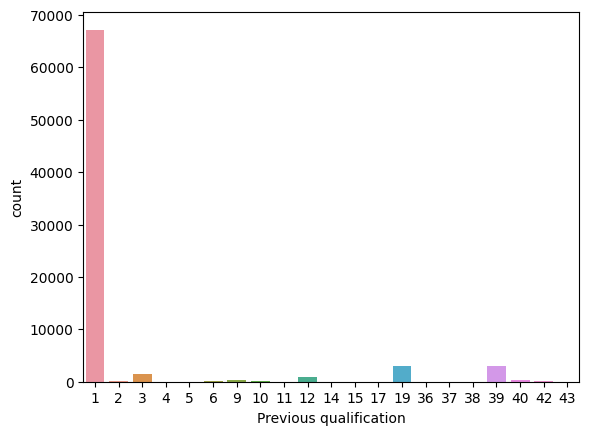

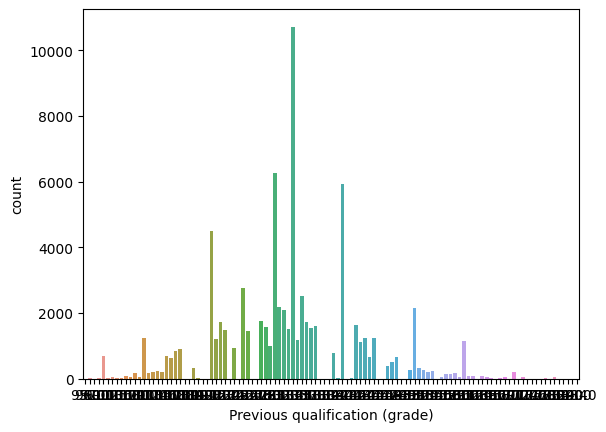

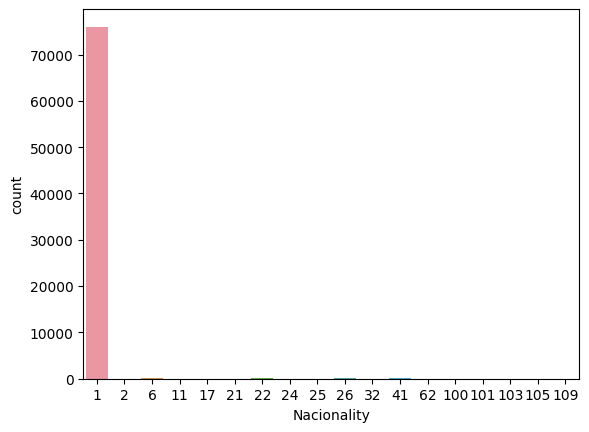

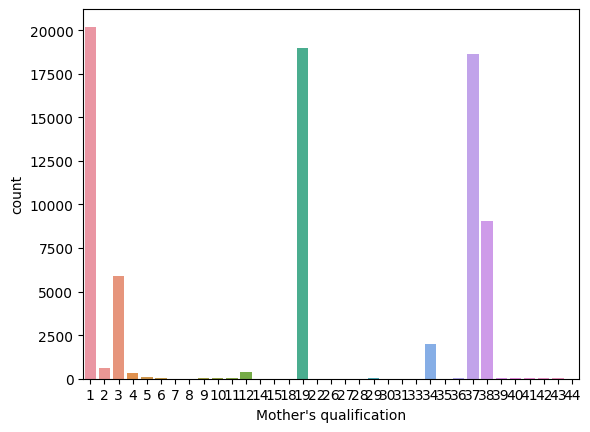

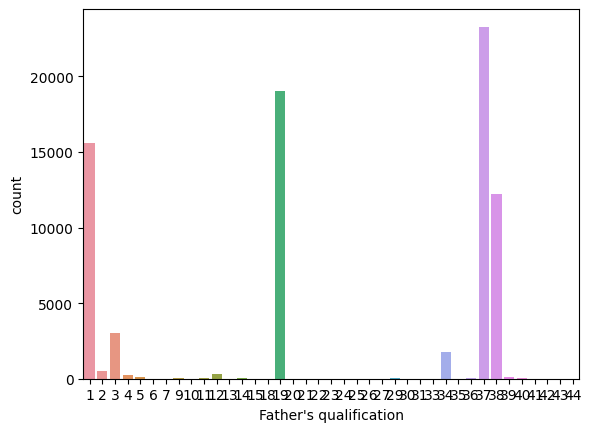

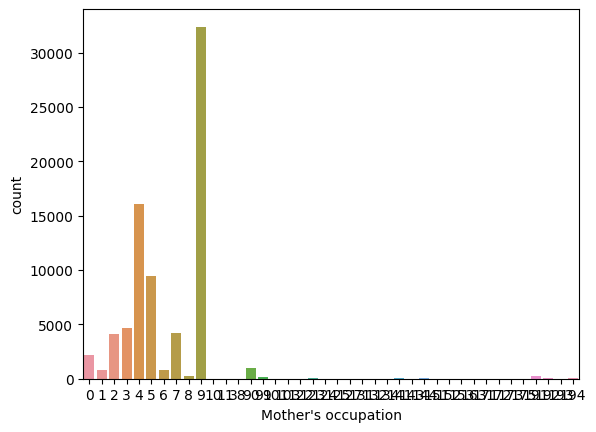

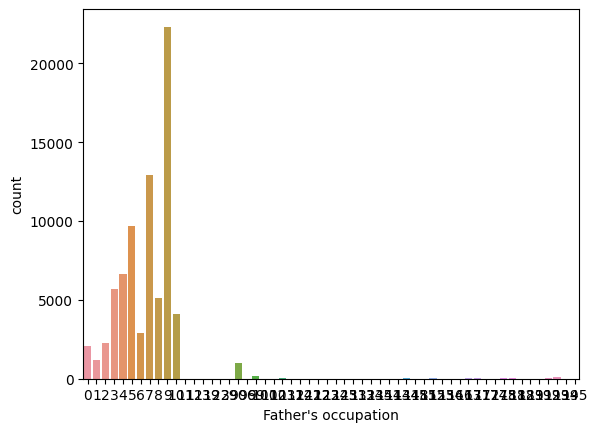

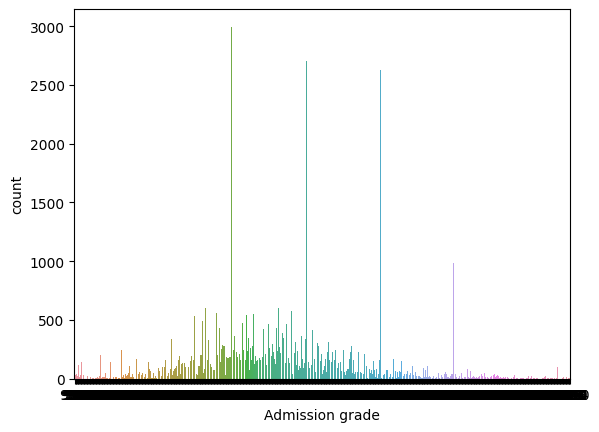

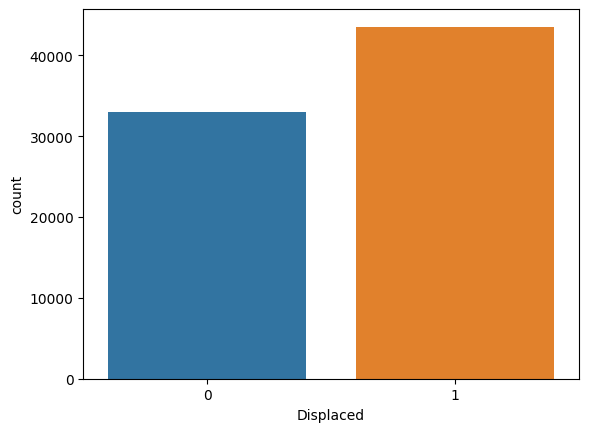

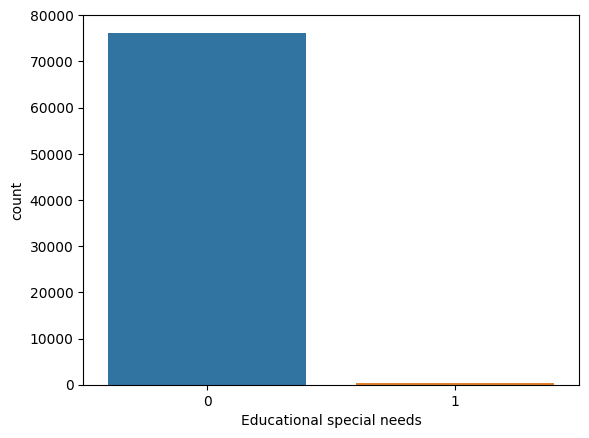

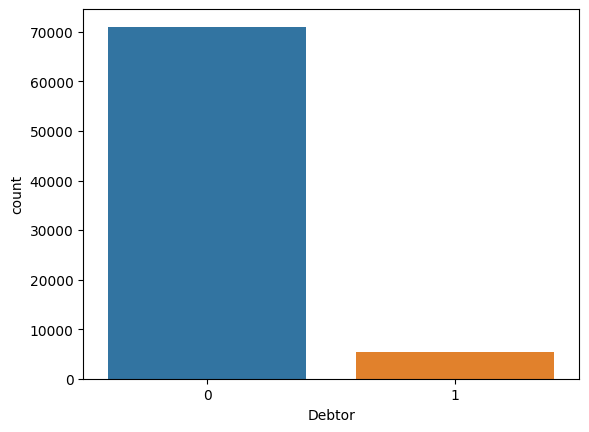

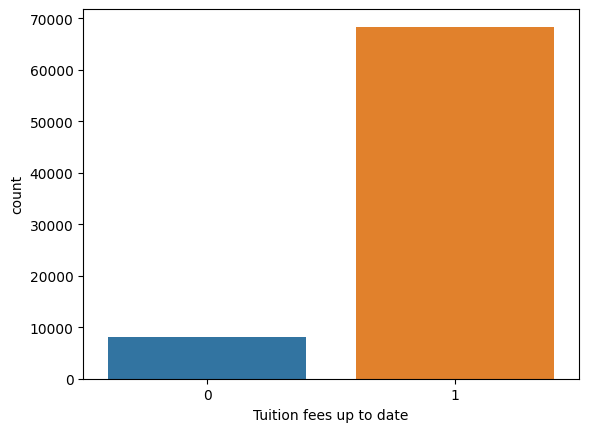

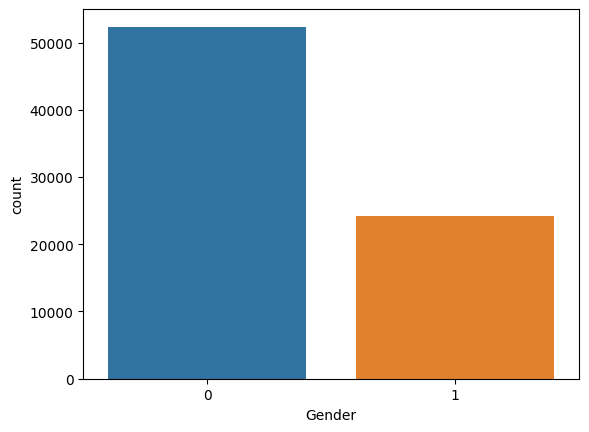

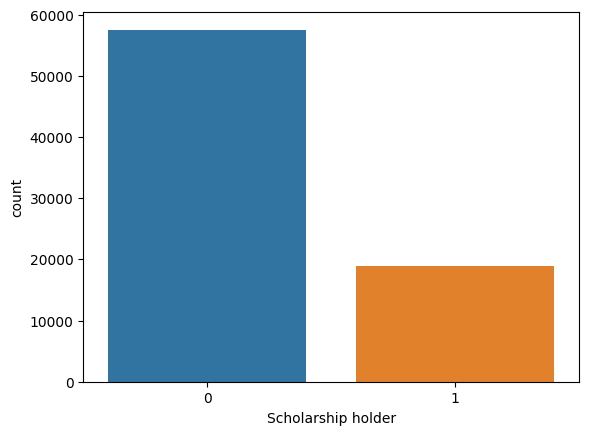

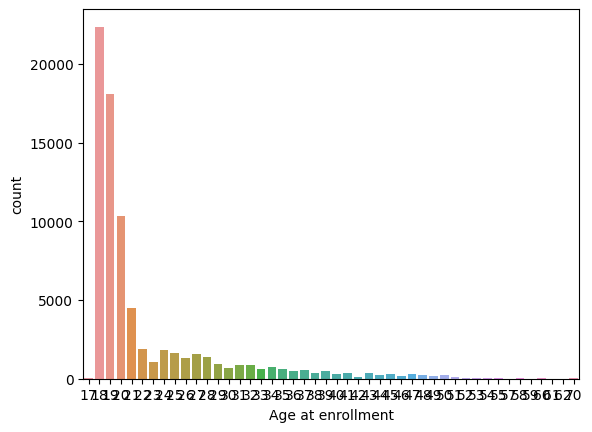

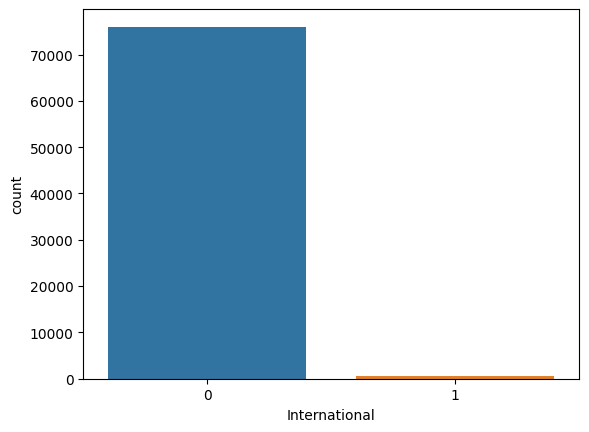

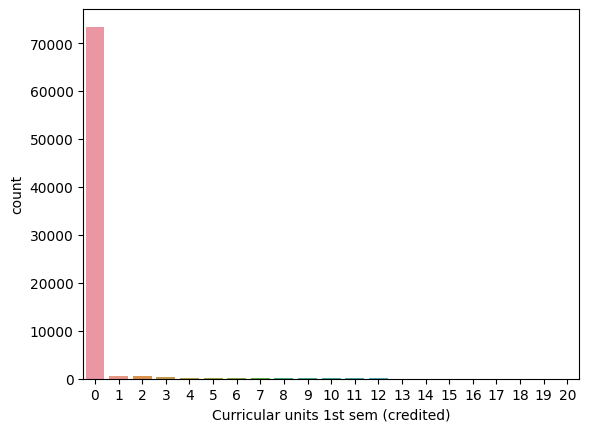

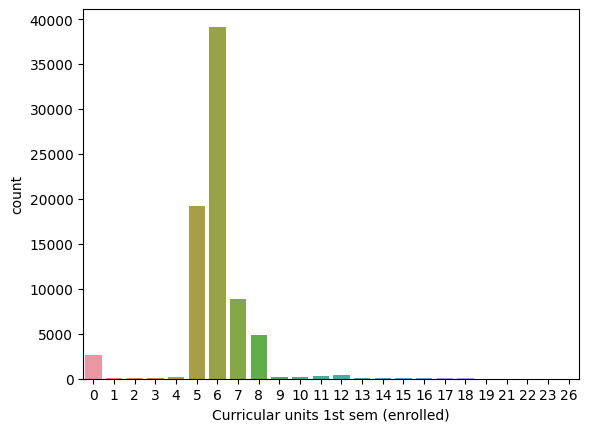

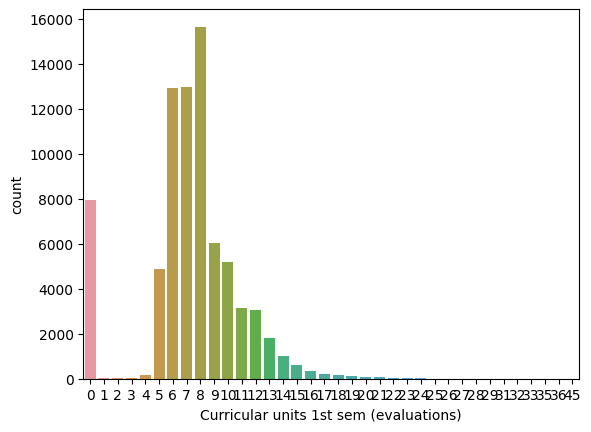

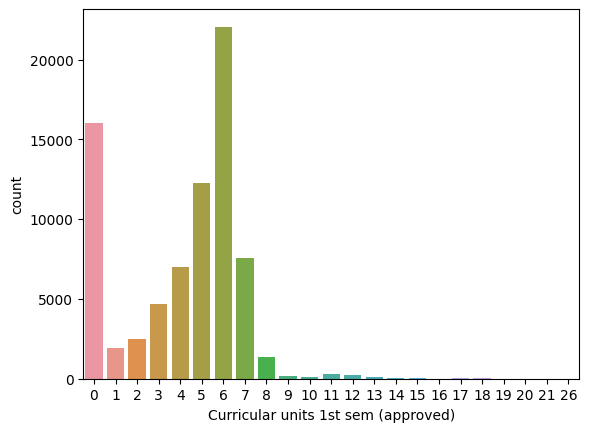

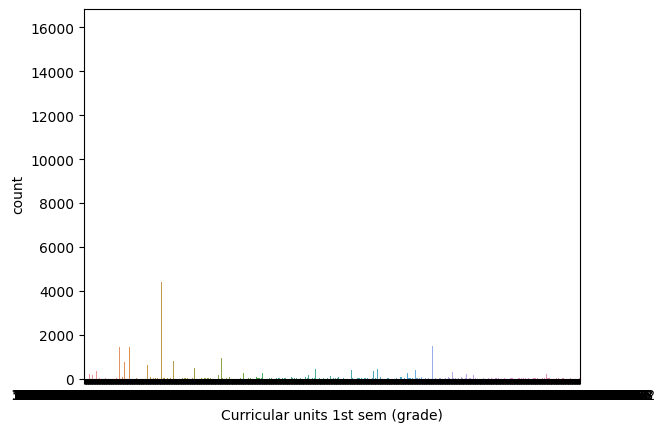

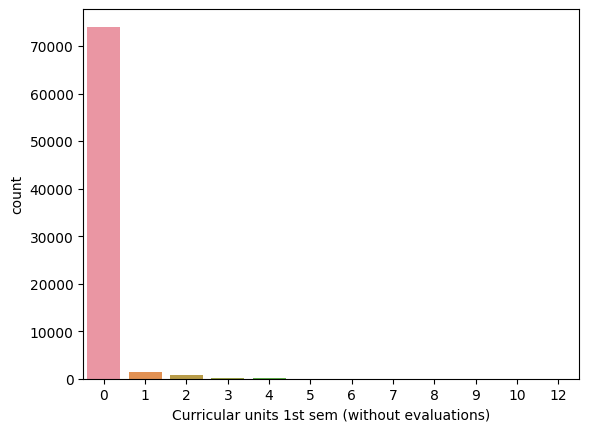

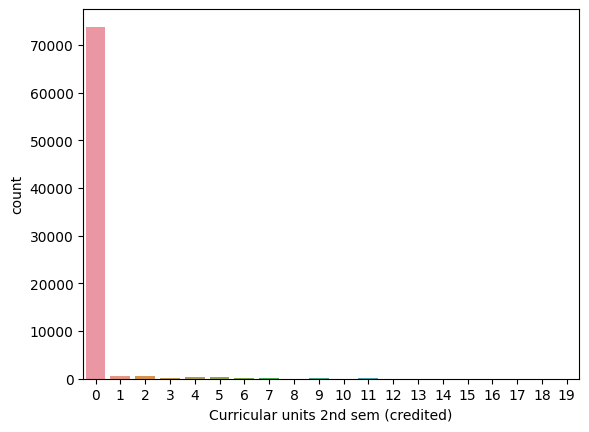

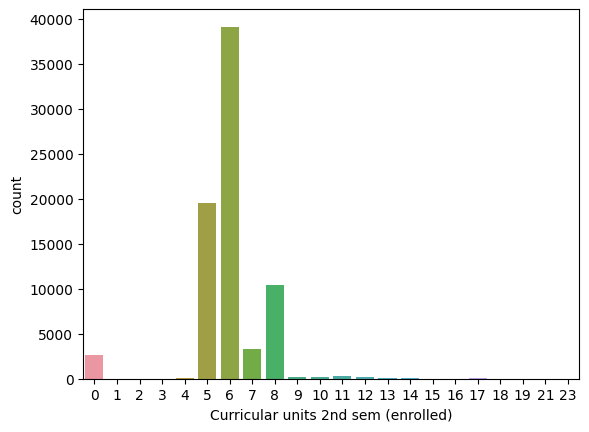

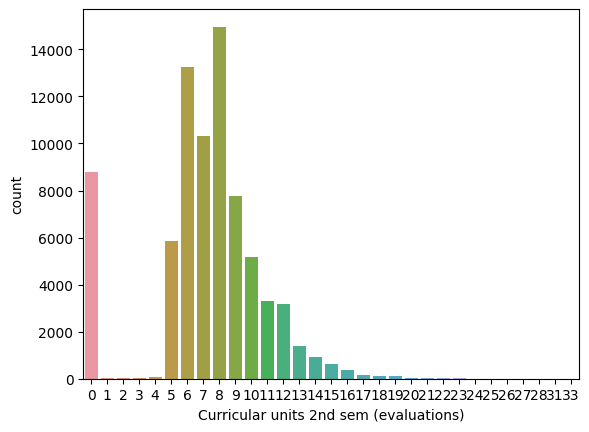

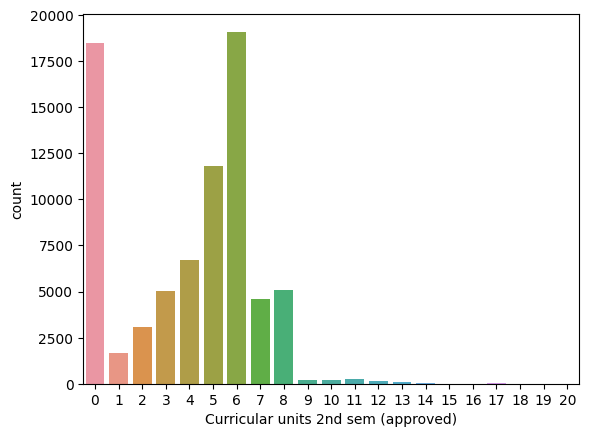

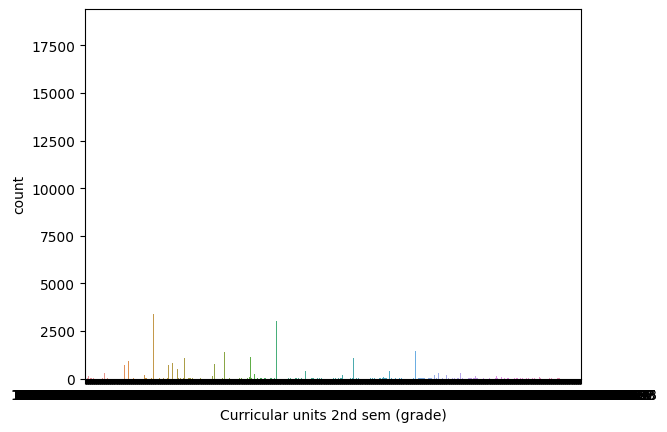

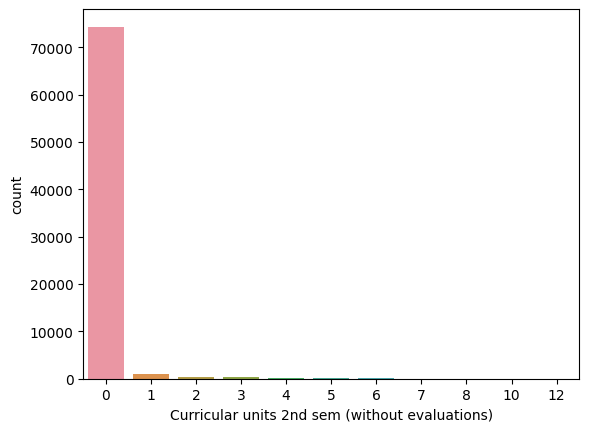

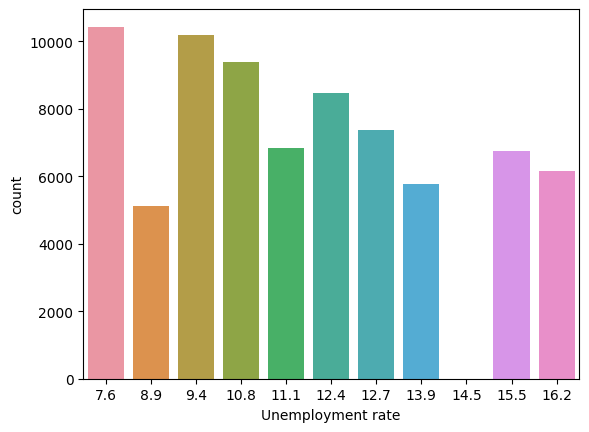

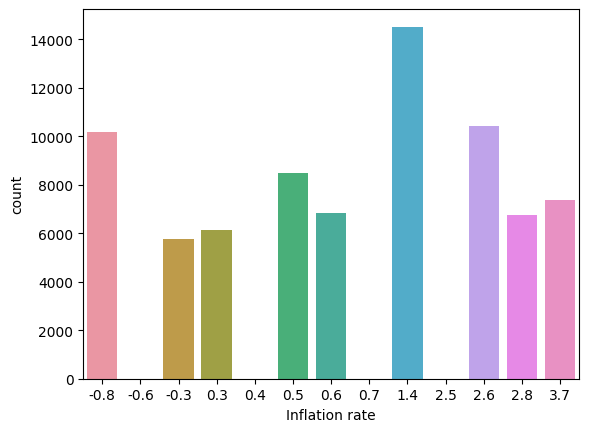

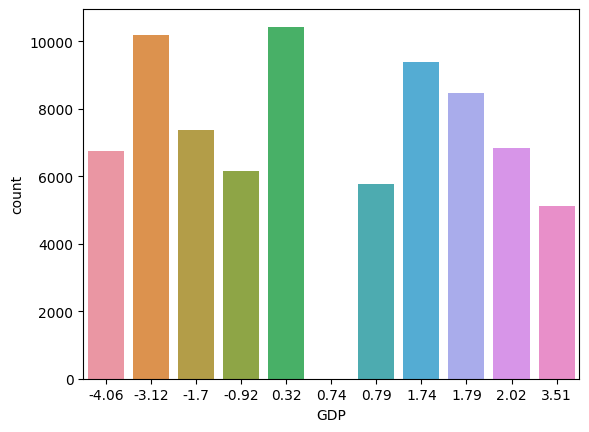

In [8]:
for i, col in enumerate(feature_cols):
    #print(df_train[cl].value_counts())
    plt.figure(i)
    sns.countplot(df_train, x=col)

In [9]:
X, y = df_train[feature_cols].values.tolist(), df_train['Target'].tolist()

In [10]:
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25,stratify=y,  random_state=42)

In [12]:
enc = LabelEncoder()
enc.fit(y_train)

y_train = enc.transform(y_train)
y_val = enc.transform(y_val)

In [13]:
#1/0

In [14]:
xgbc = xgboost.XGBClassifier()
param_grid = { 
     'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
     'max_depth' : [2,3,4,5,6, 8],
     'min_child_weight' : [ 1, 3, 5, 7 ],
     'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}
rf_RandomGrid_xgbc = RandomizedSearchCV(estimator = xgbc, param_distributions = param_grid, cv = 5, scoring='accuracy')
rf_RandomGrid_xgbc.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [2, 3, 4, 5, 6, 8],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='accuracy')

In [15]:
rf_RandomGrid_xgbc.best_params_, rf_RandomGrid_xgbc.best_score_

({'min_child_weight': 1,
  'max_depth': 6,
  'learning_rate': 0.15,
  'gamma': 0.3,
  'colsample_bytree': 0.4},
 0.8320206281484233)

In [16]:
print (f'Train Accuracy - : {rf_RandomGrid_xgbc.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid_xgbc.score(X_val,y_val):.3f}')

Train Accuracy - : 0.857
Test Accuracy - : 0.830


In [17]:
model = xgboost.XGBClassifier(**rf_RandomGrid_xgbc.best_params_)
model.fit(X_train, y_train)

print(model.score(X_train, y_train), model.score(X_val, y_val))

0.8565728026765177 0.8302143230527966


In [18]:
scores = cross_val_score(model,X_train, y_train,cv=10)
print(scores)

[0.83220073 0.83289772 0.84352675 0.83167799 0.82627635 0.82767033
 0.83464018 0.82226869 0.83234577 0.83914256]


In [19]:
print(np.std(scores))
print(np.mean(scores))

0.00580883771016873
0.8322647061913827


In [20]:
X_test = df_test.drop(columns=['id']).values.tolist()
X_test = scaler.transform(X_test)
pred_test = model.predict(X_test)

pred_test_lbl = enc.inverse_transform(pred_test)

df_sub['Target'] = pred_test_lbl
df_sub.to_csv("submission.csv", index=False)

In [21]:
df_sub.head(2)

,id,Target
0,76518,Dropout
1,76519,Graduate
